In [2]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Read data per hexagon and year
os.chdir('TODO')
df_csv_hex = pd.read_csv('data/forestdata_fulltab_hex_3000ha_reproj.csv',encoding='ANSI')
df_csv_hex.shape

(80038, 92)

In [6]:
# df_csv_hex.columns

# Chapter 4.2 - Bivariate Exploratory Data Analysis of the RS Products

In [4]:
df_csv_values = df_csv_hex[[
            'year',
            'id',                # Hexagon Id
            'agbd_mean',         # AGBD (Mg/ha)
            'cover_mean',        # TCC (%)
            'fdh_normal_mean',   # FDHI
            'rh_95_mean',        # CH (m)
            'fcsd_mean',         # FCSD (%), only 2018-2021
            'fccl_ges_perc'     # FCCL in % per hexagon and year
            ]].copy()

# Adjust the percent values for each attribute
df_csv_values['fcsd_mean'] = df_csv_values['fcsd_mean']/100
df_csv_values['fccl_ges_perc'] = df_csv_values['fccl_ges_perc']*100
df_csv_values.shape

(80038, 8)

In [5]:
# Rename
df_syn = df_csv_values.rename(
        columns={"agbd_mean": "AGBD", 
                 "cover_mean": "TCC",
                 "fdh_normal_mean": "FHDI",
                 "rh_95_mean" : "CH",
                 'fcsd_mean': "FCSD",
                 'fccl_ges_perc': 'FCCL'
                },
         )

In [6]:
df_syn.describe()

,year,id,AGBD,TCC,FHDI,CH,FCSD,FCCL
count,80038.000000,80038.000000,77049.000000,77049.000000,77049.000000,77049.000000,45719.000000,80038.000000
mean,2020.000000,5717.500000,175.516229,57.600147,275.732596,20.801172,16.830239,1.111077
std,2.000012,3300.732096,20.013763,5.558929,11.590688,1.805133,6.018313,2.127785
min,2017.000000,1.000000,46.174312,16.536168,183.425178,7.266055,3.469693,0.000000
25%,2018.000000,2859.000000,163.809281,54.746032,270.159708,19.763110,12.738011,0.186801
50%,2020.000000,5717.500000,176.037405,58.355601,277.597665,20.818406,15.348003,0.487366
75%,2022.000000,8576.000000,187.874739,61.388026,283.510731,21.950752,19.248931,1.133736
max,2023.000000,11434.000000,265.337405,73.964536,305.981656,27.097553,55.020426,87.096774


Some observations:

1. forest structure attributes only in 77049 samples, fccl in more samples (80038)
2. FCSD only from 2018 - 2021.
3. Maximum FCCL in a hexagon is 87%

In [7]:
# The missing forest structure attributes are per hexagon, not year:
df_no_fcsd = df_syn.drop(['FCSD'], axis = 1)
df_fsa_NaN = df_no_fcsd[df_no_fcsd.isna().any(axis=1)]
print("Number of samples with NaN in forest structure attributes: " + str(80038-77049))
print("Number of affected hexagons * years: " + str(pd.unique(df_fsa_NaN['id']).size * 7))

Number of samples with NaN in forest structure attributes: 2989
Number of affected hexagons * years: 2989


In [9]:
# These hexagons could be removed:
df_corr = df_syn.dropna(subset=['AGBD'])
# Or kept, when drawing correlations they are automatically removed:
df_corr = df_syn
# for correlations the Hexagon id is not needed:
df_corr = df_corr.drop(['id'], axis = 1)
df_corr.shape

(80038, 7)

## Pairplots

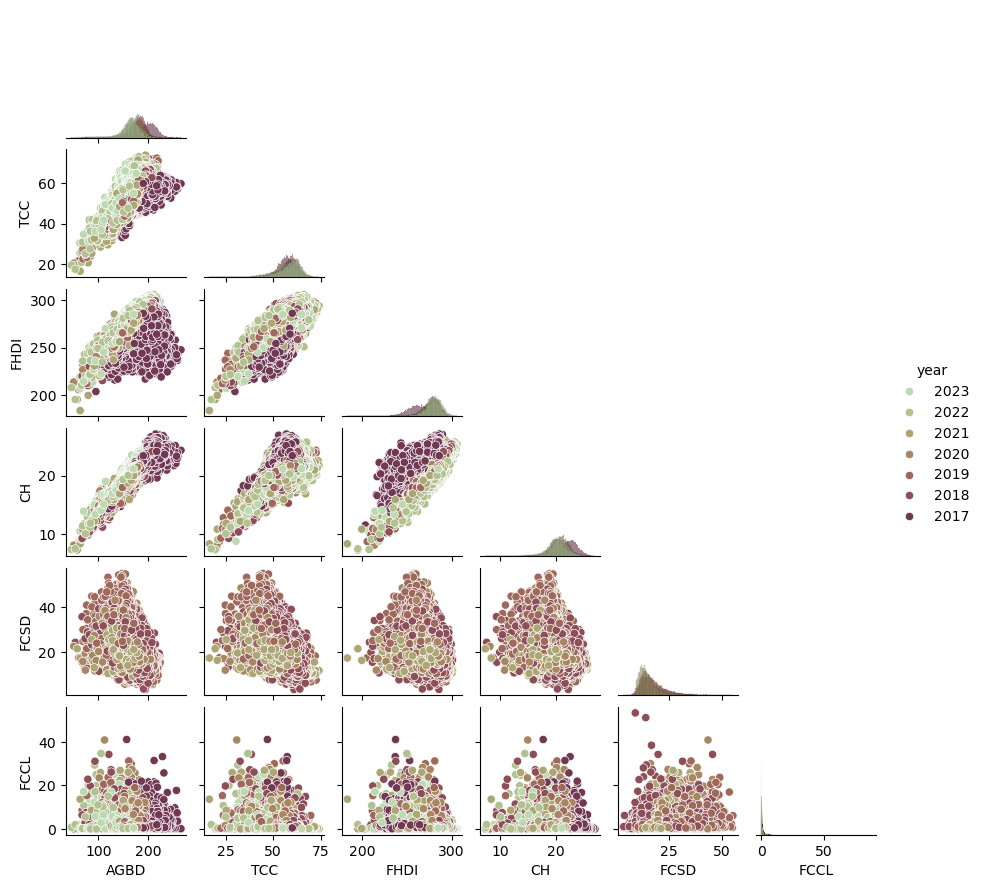

In [11]:
# Keep year as hue
palette = sns.cubehelix_palette(n_colors=df_corr["year"].nunique(), start=0, rot=0.75, dark=0.3, light=0.8)
sns.pairplot(df_corr, corner=True, hue="year", height=1.5, palette=palette, diag_kind="hist", hue_order=sorted(df_corr["year"].unique(), reverse=True))

## Heatmaps

In [12]:
# for heatmaps the attribute year shall be removed
df_struct = df_corr.drop(['year'], axis = 1)
df_struct.shape

(80038, 6)

In [13]:
# without 2017
df_no_2017 = df_corr.loc[(df_corr['year'] > 2017)].drop(['year'], axis = 1)
df_no_2017.shape

(68604, 6)

### Correlation heatmap for Pearson’s’s correlation coefficient for 2017–2023

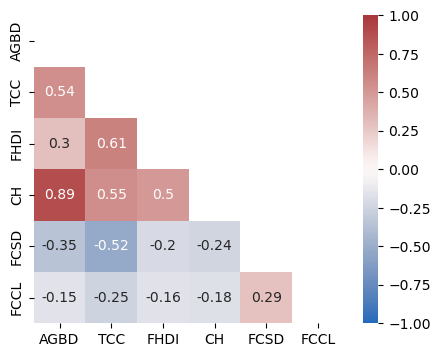

In [14]:
corr_df_pearson = df_struct.corr(method='pearson')

mask = np.triu(np.ones_like(corr_df_pearson, dtype=bool))
plt.figure(figsize=(5, 4))
sns.heatmap(corr_df_pearson, mask = mask, vmin=-1, vmax=1, annot=True, cmap='vlag')
plt.show()

### Correlation heatmap for Pearson’s’s correlation coefficient for 2018–2023

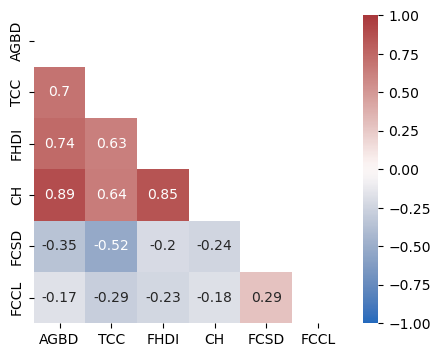

In [15]:
corr_df_pearson = df_no_2017.corr(method='pearson')

mask = np.triu(np.ones_like(corr_df_pearson, dtype=bool))
plt.figure(figsize=(5, 4))
sns.heatmap(corr_df_pearson, mask = mask, vmin=-1, vmax=1, annot=True, cmap='vlag')
plt.show()

### Correlation heatmap for Spearman’s correlation coefficient for 2018–2023

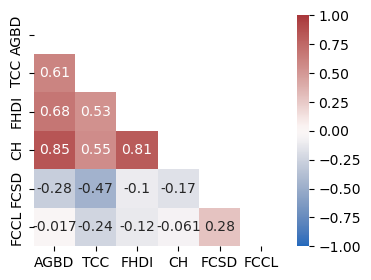

In [16]:
corr_df_spearman = df_no_2017.corr(method='spearman')

mask = np.triu(np.ones_like(corr_df_spearman, dtype=bool))
plt.figure(figsize=(4, 3))
sns.heatmap(corr_df_spearman, mask = mask, vmin=-1, vmax=1, annot=True, 
            cmap='vlag')
plt.show()